Attemping to appy isolation forest to amazon access data;
fails because auto one_hot enconding in sklearn.
In the future, try the catboose maping for categorical to numeric values

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [5]:
#check for class imbalances
df['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

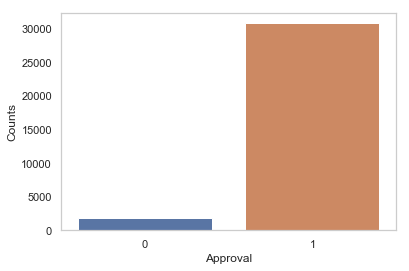

In [6]:
sns_plot=sns.countplot(x="ACTION", data=df)
sns_plot.set(xlabel='Approval', ylabel='Counts')
sns_plot.grid(False)
fig = sns_plot.get_figure()
fig.savefig("class_imbalance.png")


In [7]:
#check if objects 
df.dtypes

ACTION              int64
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

In [8]:
#Covert to objects
df=df.astype(int).astype(str)
df['ACTION']=df['ACTION'].astype(str).astype(int)

In [9]:
df.dtypes

ACTION               int64
RESOURCE            object
MGR_ID              object
ROLE_ROLLUP_1       object
ROLE_ROLLUP_2       object
ROLE_DEPTNAME       object
ROLE_TITLE          object
ROLE_FAMILY_DESC    object
ROLE_FAMILY         object
ROLE_CODE           object
dtype: object

In [10]:
y=df['ACTION']
X=df.drop(["ACTION"], axis=1)

In [11]:
X.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


18,000 false negatives is pretty bad, let try a altering confidence

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [13]:
from sklearn.ensemble import IsolationForest

In [30]:
clf = IsolationForest(random_state=42, contamination=.06, bootstrap=True,)
clf.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=True, contamination=0.06,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=42, verbose=0)

In [31]:
y_pred = clf.predict(X_test)


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [32]:
confusion_matrix(y_test, y_pred_train)

array([[   0,    0,    0],
       [  38,    0,  341],
       [ 495,    0, 5680]])

In [33]:
print("Accuracy:", list(y_pred_train).count(1)/y_pred_train.shape[0])

Accuracy: 0.9186756179432408
